In [1]:
from numqt import *

In [2]:
#-----------------------------------------------------------
# Characteristic lengths of the problem
#-----------------------------------------------------------
Lx = 1 # Characteristic length along x
Ly = 1 # Characteristic length along y
#-----------------------------------------------------------
# Problem's parameters
#-----------------------------------------------------------
hbar = 1 # reduced Plack constant 
m = 1 # e-mass
wx = hbar / (m * Lx**2) # x confinement frequency
wy = hbar / (m * Ly**2) # y confinement frequency
Delta = 1 # zeeman splitting

#-----------------------------------------------------------
# Creating operators
#-----------------------------------------------------------
Nx_states = 30 # Number of states to include
Ny_states = 30 # Number of states to include
bosonic_ops = bos_ops(dimx = Nx_states, dimy = Ny_states, other_dims=[2]) # Obtaining bosonic operators
a_x, ad_x = bosonic_ops["x"] # Extracting bosonic operators
a_y, ad_y = bosonic_ops["y"] # Extracting bosonic operators

px = bos_p(a_x, ad_x, omega = wx, mass = m, hbar = hbar) # momentum operator as fn of a, ad
x = bos_x(a_x, ad_x, omega = wx, mass = m, hbar = hbar) # position operator as fn of a, ad
py = bos_p(a_y, ad_y, omega = wy, mass = m, hbar = hbar) # momentum operator as fn of a, ad
y = bos_x(a_y, ad_y, omega = wy, mass = m, hbar = hbar) # position operator as fn of a, ad

s0, sx, sy, sz, sx2, sy2, sz2 = spin12(dimx = Nx_states, dimy = Ny_states, hbar = hbar)

In [3]:
H = 0.5*Delta * sz + (px@px + py@py) / (2*m) + 0.5 * m *(wx**2 * x@x + wy**2 * y@y)
H = Hamiltonian(H)
H.H

<Compressed Sparse Row sparse array of dtype 'complex128'
	with 1800 stored elements and shape (1800, 1800)>

In [4]:
k = 120
energies, wavefunctions = H.solve(k)

Text(0.5, 0, 'n')

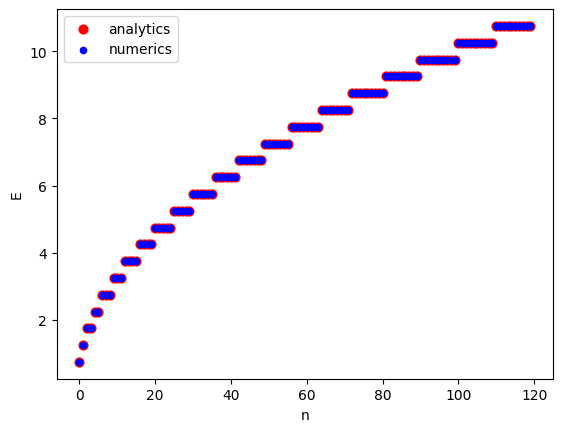

In [5]:
def analytics(s, nx, ny):
    return 0.25 * Delta * (-1)**s + hbar * wx * (nx + 0.5) + hbar * wy * (ny + 0.5)


analytical_energies = sorted([analytics(s, nx, ny) for s in (0,1) for nx in range(Nx_states) for ny in range(Ny_states)])[:k]

plt.scatter(range(k), analytical_energies, c="r", s = 40, label = "analytics")
plt.scatter(range(k), sorted(energies), c="b", s = 20, label = "numerics")
plt.legend()
plt.ylabel("E")
plt.xlabel("n")

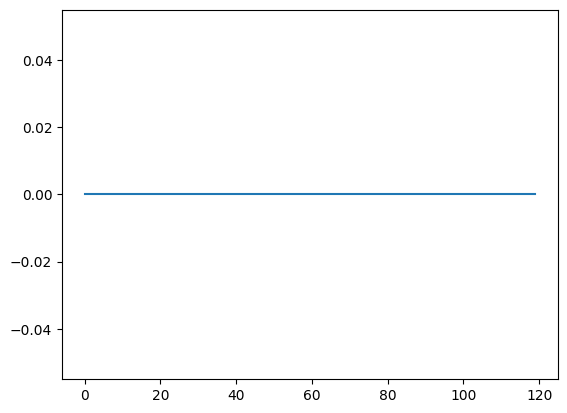

In [6]:
plt.plot(range(k), np.array(analytical_energies)- np.array(sorted(energies)).round(4))